In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv(r'C:\Users\82106\Desktop\과제테스트\repair2.csv')

   caseID              taskID originator eventtype contact RepairType  \
0     419  InformClientSurvey     System  complete     NaN        NaN   
1     561       ArrangeSurvey     Monica  complete     NaN        NaN   
2     902   ReadyInformClient     System  complete     NaN        NaN   
3      18              Survey        Edd     start     NaN        NaN   
4     852              Survey        Edd  complete     NaN        NaN   

   objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
0        NaN              NaN                  NaN         NaN      NaN   
1        NaN              NaN                  NaN         NaN      NaN   
2        NaN              NaN                  NaN         NaN     True   
3        NaN              NaN                  NaN         NaN      NaN   
4        NaN             True                240.0         1.0      NaN   

         date   time  
0  2020-01-06  11:51  
1  2020-01-07  13:48  
2  2020-01-08  16:20  
3  2020-01-09   6:

In [40]:
print(df.describe())

             caseID    objectKey  EstimatedRepairTime  RepairCode  \
count  13262.000000   927.000000           927.000000  927.000000   
mean     499.022018  5084.261057           194.347357    1.635383   
min        1.000000    13.000000            60.000000    1.000000   
25%      250.000000  2643.500000           120.000000    1.000000   
50%      497.000000  5079.000000           220.000000    1.000000   
75%      746.000000  7491.000000           240.000000    2.000000   
max     1000.000000  9971.000000           480.000000    4.000000   
std      289.115169  2867.881395            79.761931    0.904010   

                                date  
count                          13249  
mean   1973-04-23 04:48:14.346743168  
min              1905-05-23 00:00:00  
25%              1970-01-04 00:00:00  
50%              1970-01-06 00:00:00  
75%              1970-01-10 00:00:00  
max              2022-05-14 00:00:00  
std                              NaN  


# caseID당 taskID 개수 계산

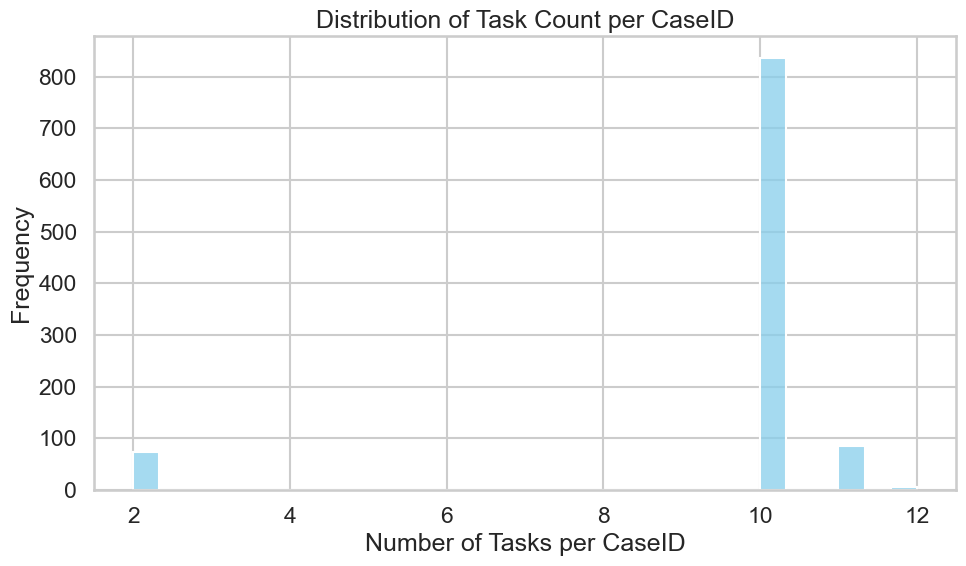

taskID
10    836
11     85
2      73
12      5
9       1
Name: count, dtype: int64


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# caseID당 taskID 개수 계산
task_count_per_case = df.groupby('caseID')['taskID'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(task_count_per_case, bins=30, color='skyblue', alpha=0.75)
plt.title("Distribution of Task Count per CaseID")
plt.xlabel("Number of Tasks per CaseID")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print(task_count_per_case.value_counts())

대부분 한 caseID당 10개의 taskID가 할당된다.

# 결측치 개수 파악

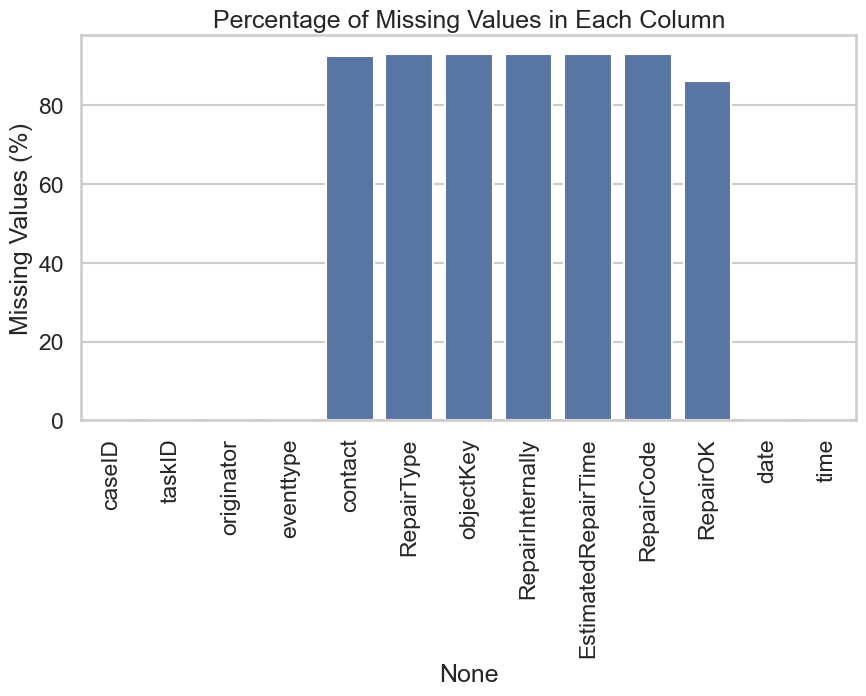

caseID                     0
taskID                     2
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
dtype: int64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율 계산
missing_percentage = (missing_values / len(df)) * 100

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values in Each Column")
plt.show()

df.isnull().sum()

#  taskID의 분포

C:\Users\82106\AppData\Local\Temp\ipykernel_2268\3138404432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='taskID', data=df,


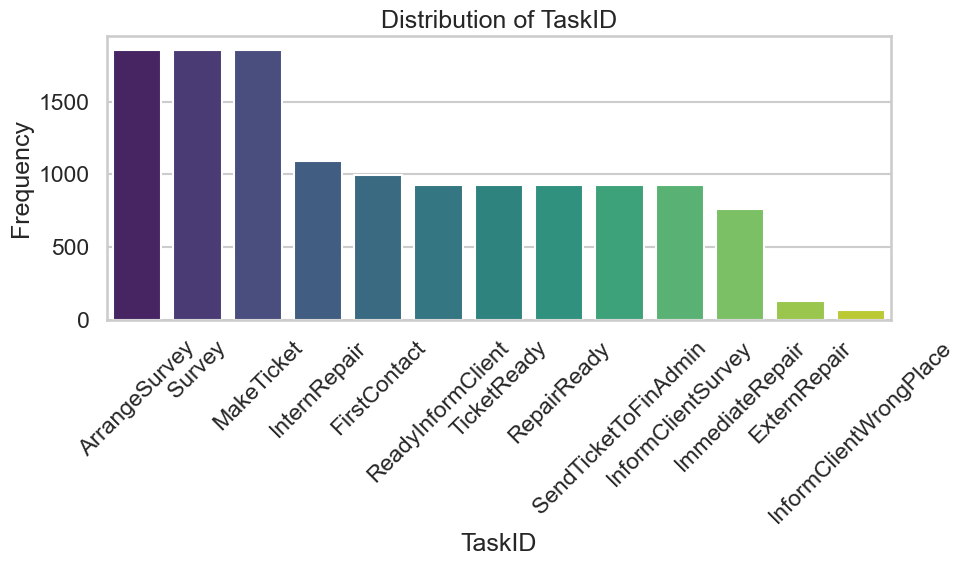

taskID
ArrangeSurvey             1854
Survey                    1854
MakeTicket                1854
InternRepair              1094
FirstContact               999
ReadyInformClient          927
TicketReady                927
RepairReady                927
SendTicketToFinAdmin       927
InformClientSurvey         926
ImmediateRepair            766
ExternRepair               132
InformClientWrongPlace      73
Name: count, dtype: int64


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='taskID', data=df,
              order=df['taskID'].value_counts().index,
              palette='viridis')
plt.title("Distribution of TaskID")
plt.xlabel("TaskID")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df['taskID'].value_counts())

# 연도별 수리 요청 추이 확인 (complete 기준)

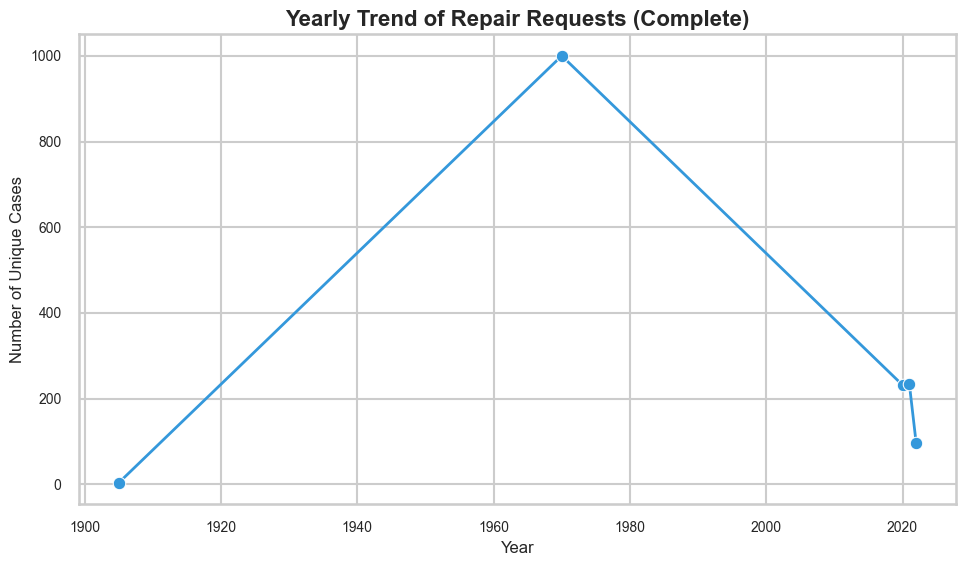

date
1905.0       4
1970.0    1000
2020.0     232
2021.0     235
2022.0      97
Name: caseID, dtype: int64


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# date 칼럼을 datetime 타입으로 변환
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# eventtype이 "complete"인 데이터 필터링
complete_df = df[df['eventtype'] == 'complete']

# 연도별 수리 요청 추이 (unique caseID) 확인
yearly_cases_complete = complete_df.groupby(complete_df['date'].dt.year)['caseID'].nunique()

# Seaborn 스타일과 컨텍스트 설정
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10, 6))

# 선 그래프 그리기
sns.lineplot(x=yearly_cases_complete.index, y=yearly_cases_complete.values,
             marker='o', color='#3498db', linewidth=2, ax=ax)

# 축 및 제목 설정
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Unique Cases", fontsize=12)
ax.set_title("Yearly Trend of Repair Requests (Complete)", fontsize=16, fontweight='bold')

# 축 눈금 스타일 조정
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

print(yearly_cases_complete)

연도별 complete된 수리요청이 1905년4개와 1970년대 1000개로 2020년 이전 50년 연도 차이가나는 데이터가 1004개이다. 이는 이상치일 확률이 상당히 높다.

원본과 대상 시스템 간의 날짜 형식이 일치하지 않아, 변환 과정에서 잘못된 값이 입력된것으로 보인다.

Unix 시간은 1970년 1월 1일을 기준으로 하기 때문에, 변환 오류 시 해당 날짜로 설정

# taskID별 연도 추이  (complete 기준, 2020년 이후)

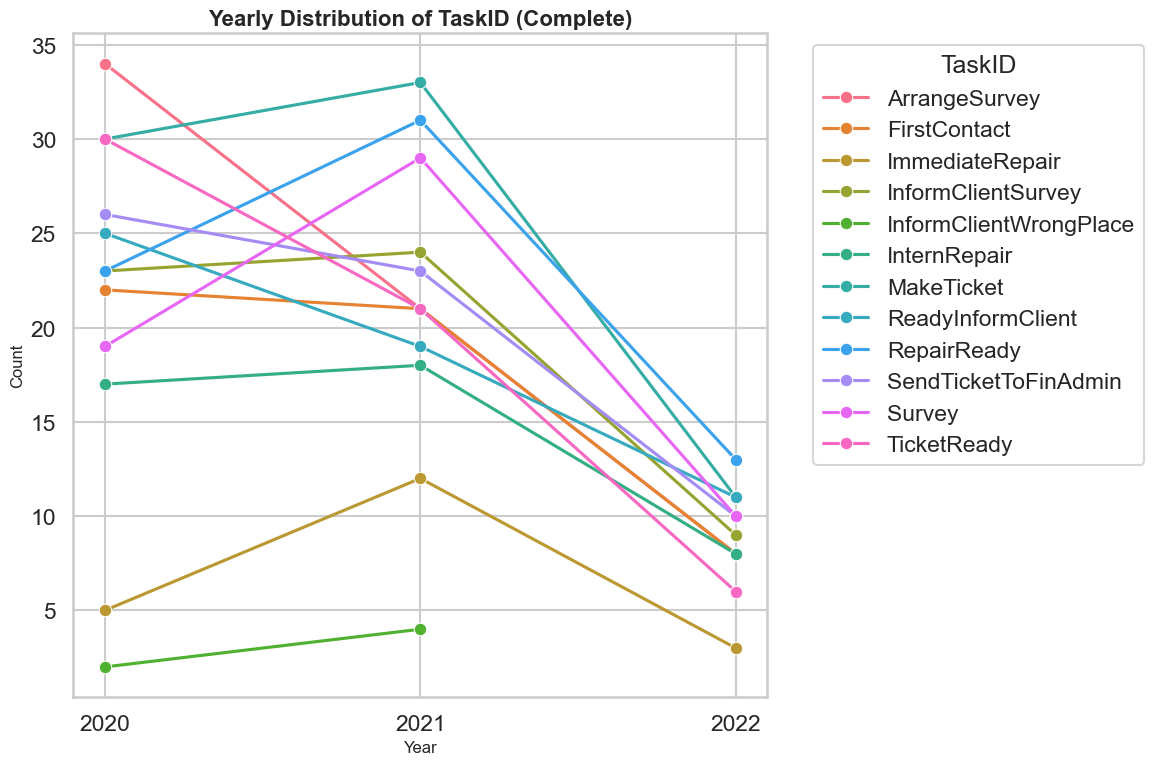

TaskID Ranking for 2020:
    year                  taskID  count
0   2020           ArrangeSurvey     34
1   2020              MakeTicket     30
2   2020             TicketReady     30
3   2020    SendTicketToFinAdmin     26
4   2020       ReadyInformClient     25
5   2020      InformClientSurvey     23
6   2020             RepairReady     23
7   2020            FirstContact     22
8   2020                  Survey     19
9   2020            InternRepair     17
10  2020         ImmediateRepair      5
11  2020  InformClientWrongPlace      2


TaskID Ranking for 2021:
    year                  taskID  count
0   2021              MakeTicket     33
1   2021             RepairReady     31
2   2021                  Survey     29
3   2021      InformClientSurvey     24
4   2021    SendTicketToFinAdmin     23
5   2021           ArrangeSurvey     21
6   2021            FirstContact     21
7   2021             TicketReady     21
8   2021       ReadyInformClient     19
9   2021            InternRe

In [ ]:
complete_df = complete_df.dropna(subset=['date'])

complete_df['year'] = complete_df['date'].dt.year.astype(int)

# 1905년과 1970년 데이터 제외
complete_df = complete_df[~complete_df['year'].isin([1905, 1970])]

# 연도별, taskID별 건수 집계
task_yearly_counts = complete_df.groupby(['year', 'taskID']).size().reset_index(name='count')

# Seaborn 스타일 설정
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 8))

# 시각화: 연도별 각 taskID의 분포 (line plot)
sns.lineplot(data=task_yearly_counts, x='year', y='count', hue='taskID', marker='o')

plt.title("Yearly Distribution of TaskID (Complete)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

# x축 눈금에 정수 연도 값만 표시
unique_years = sorted(complete_df['year'].unique())
plt.xticks(unique_years)

plt.legend(title='TaskID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 분석할 연도 리스트
years = [2020, 2021, 2022]

# 각 연도별로 내림차순 정렬한 DataFrame 출력
for year in years:
    df_year = task_yearly_counts[task_yearly_counts['year'] == year].sort_values(by='count', ascending=False).reset_index(drop=True)
    print(f"TaskID Ranking for {year}:")
    print(df_year)
    print("\n")

# complete와 start 비율 시각화

C:\Users\82106\AppData\Local\Temp\ipykernel_2268\3604239224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis', ax=ax)


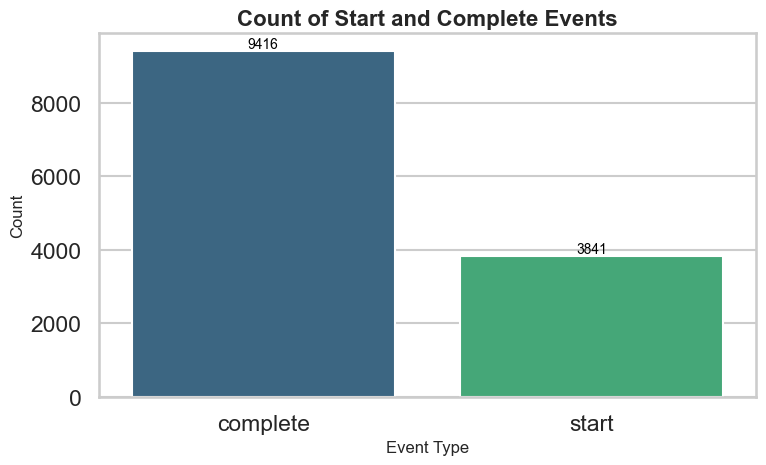

eventtype
complete    9416
start       3841
Name: count, dtype: int64


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(8, 5))

# eventtype별 작업 수 카운트
event_counts = df['eventtype'].value_counts()

# 바 그래프 그리기
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis', ax=ax)

# 축 및 제목 설정
ax.set_xlabel("Event Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Count of Start and Complete Events", fontsize=16, fontweight='bold')

# 각 바 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print(event_counts)

Start보다 Complete 가 많으므로 이 원인에 대해서 추가 분석

# Complete와 Start 비율 차이 원인 분석

In [48]:
# 1. 동일한 caseID-taskID가 여러 번 완료(complete)된 경우 확인
duplicate_complete_df = df[df['eventtype'] == 'complete'].groupby(['caseID', 'taskID']).size().reset_index(name='complete_count')

# 여러 번 완료된 경우 필터링
multiple_complete_df = duplicate_complete_df[duplicate_complete_df['complete_count'] > 1]

multiple_complete_df.head(10)

,caseID,taskID,complete_count
97,12,InternRepair,2
356,39,InternRepair,2
479,52,InternRepair,2
571,62,InternRepair,2
665,73,InternRepair,2
767,84,InternRepair,2
1027,111,InternRepair,2
1156,124,InternRepair,2
1344,143,InternRepair,2
1483,160,InternRepair,2


In [50]:
# start와 complete의 담당자(originator) 분포 비교
originator_comparison = df.groupby(['eventtype', 'originator']).size().unstack(fill_value=0)
originator_comparison

originator,Anne,Barbara,Ben,Cindy,Dian,DoIt,Edd,Eric,FixIt,Jacky,John,Lex,Monica,Nick,Paul,System
eventtype,,,,,,,,,,,,,,,,
complete,432,214,60,194,1372,0,186,49,0,219,198,56,1555,54,193,4633
start,433,214,60,194,874,66,186,49,66,218,198,56,979,54,194,0


In [53]:
# start와 complete가 있는 taskID 목록 생성
start_taskIDs = df[df['eventtype'] == 'start']['taskID'].unique()
complete_taskIDs = df[df['eventtype'] == 'complete']['taskID'].unique()

# start 없이 complete만 존재하는 taskID 찾기
only_complete_taskIDs = set(complete_taskIDs) - set(start_taskIDs)

# 해당 taskID들이 몇 번 등장하는지 확인
only_complete_tasks_df = df[df['taskID'].isin(only_complete_taskIDs) & (df['eventtype'] == 'complete')]

# taskID별 개수 집계
task_complete_counts = only_complete_tasks_df['taskID'].value_counts().reset_index()
task_complete_counts.columns = ['taskID', 'count']

task_complete_counts

,taskID,count
0,FirstContact,999
1,ReadyInformClient,927
2,RepairReady,927
3,SendTicketToFinAdmin,927
4,TicketReady,926
5,InformClientSurvey,925
6,InformClientWrongPlace,73


- 대부분 같은 caseID인경우 start가 표시되는 경우보다 complete로 표시되는경우가 더많음
- originator가 System 의 경우에는 start가 표시되지 않음
- FirstContact(첫 번째 접촉 업무) 는 별도의 start 없이 완료됨

# originator별 업무 수행 횟수

C:\Users\82106\AppData\Local\Temp\ipykernel_2268\2065920597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_originators.index, y=top_originators.values, palette='coolwarm', ax=ax)
C:\Users\82106\AppData\Local\Temp\ipykernel_2268\2065920597.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


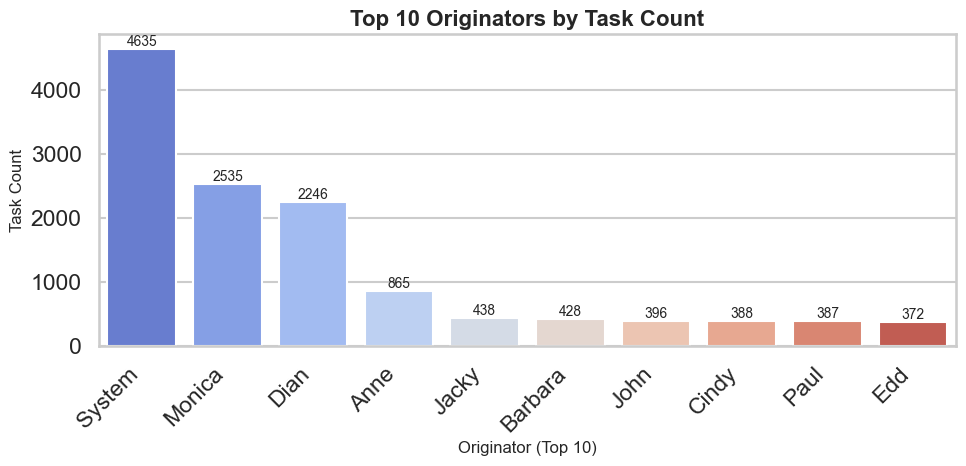

originator
System     4635
Monica     2535
Dian       2246
Anne        865
Jacky       438
Barbara     428
John        396
Cindy       388
Paul        387
Edd         372
Name: count, dtype: int64


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

#originator별 업무 수행 횟수 상위10명
top_originators = df['originator'].value_counts().head(10)

# Seaborn 스타일 설정
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot 그리기
sns.barplot(x=top_originators.index, y=top_originators.values, palette='coolwarm', ax=ax)

# 축 및 제목 설정
ax.set_xlabel("Originator (Top 10)", fontsize=12)
ax.set_ylabel("Task Count", fontsize=12)
ax.set_title("Top 10 Originators by Task Count", fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 각 바 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(top_originators)

# Originator별 taskID 분포 

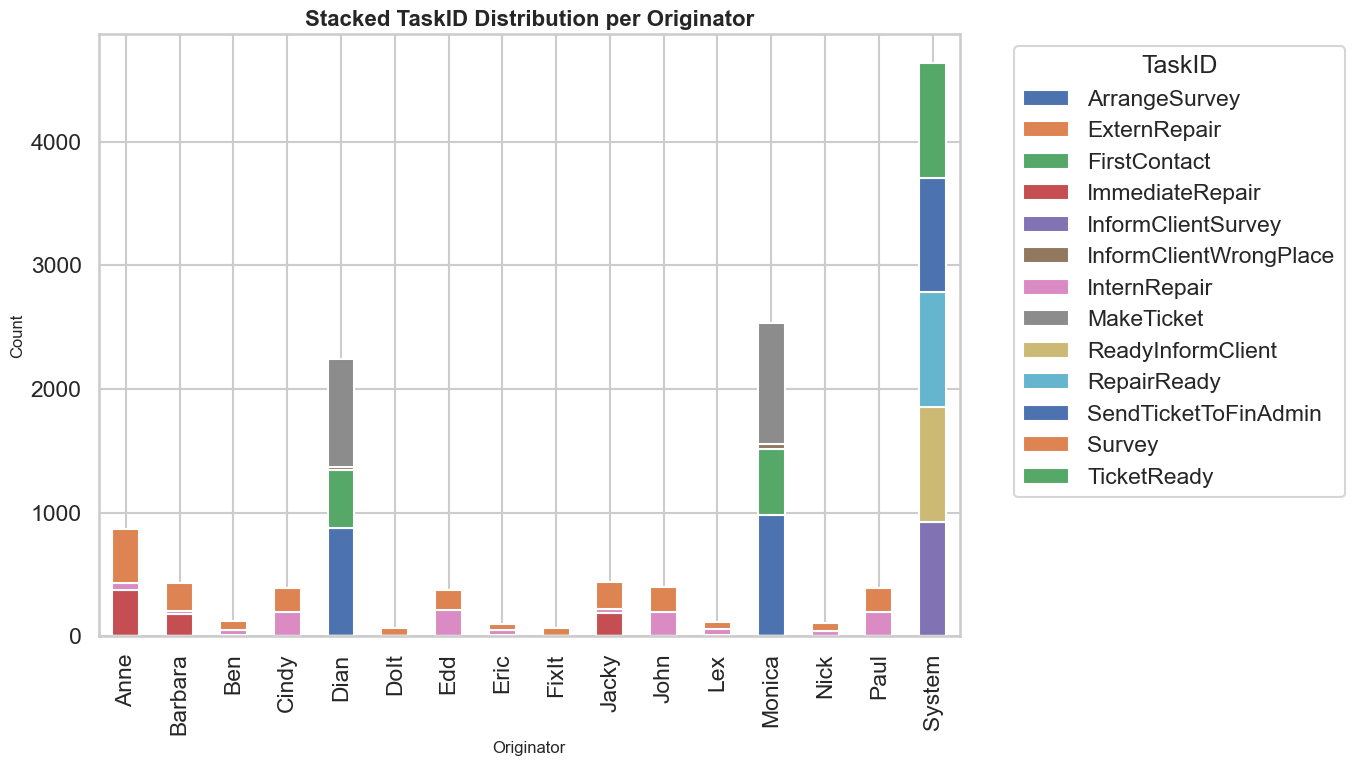

   originator                  taskID  count
0        Anne         ImmediateRepair    370
1        Anne            InternRepair     60
2        Anne                  Survey    435
3     Barbara         ImmediateRepair    176
4     Barbara            InternRepair     30
5     Barbara                  Survey    222
6         Ben         ImmediateRepair      8
7         Ben            InternRepair     42
8         Ben                  Survey     70
9       Cindy            InternRepair    200
10      Cindy                  Survey    188
11       Dian           ArrangeSurvey    877
12       Dian            FirstContact    465
13       Dian  InformClientWrongPlace     29
14       Dian              MakeTicket    874
15       DoIt            ExternRepair     66
16        Edd            InternRepair    210
17        Edd                  Survey    162
18       Eric         ImmediateRepair      8
19       Eric            InternRepair     44
20       Eric                  Survey     46
21      Fi

In [ ]:
# originator와 taskID별 빈도수 계산
originator_task_counts =df.groupby(['originator','taskID']).size().reset_index(name = 'count')

#피벗 테이블 생성
originator_task_pivot = originator_task_counts.pivot(index = 'originator', columns = 'taskID', values = 'count')

# 스택형 막대 그래프 그리기
originator_task_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Stacked TaskID Distribution per Originator", fontsize=16, fontweight='bold')
plt.xlabel("Originator", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="TaskID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(originator_task_counts)

# RepairType 분포

C:\Users\82106\AppData\Local\Temp\ipykernel_2268\2318362338.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repair_type_counts.index, y=repair_type_counts.values,
C:\Users\82106\AppData\Local\Temp\ipykernel_2268\2318362338.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


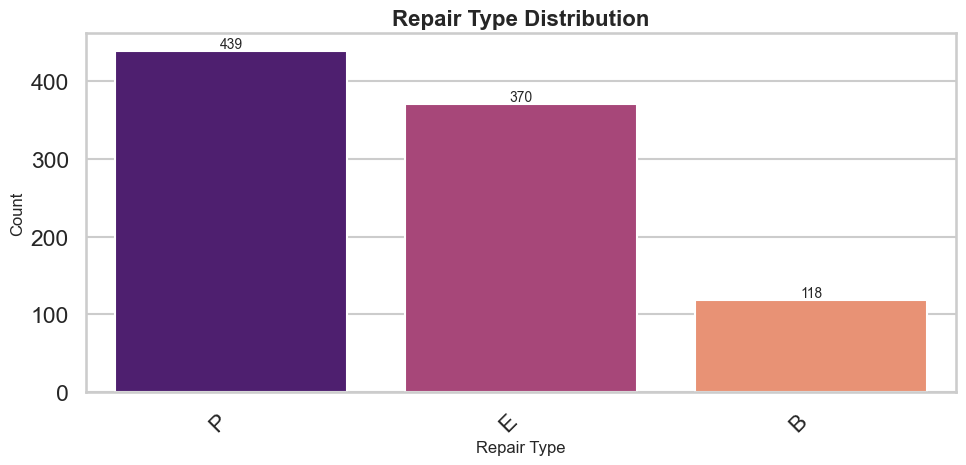

RepairType
P    439
E    370
B    118
Name: count, dtype: int64


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10, 5))

# RepairType별 수리 요청 수
repair_type_counts = df['RepairType'].value_counts()

# 바 그래프 그리기
sns.barplot(x=repair_type_counts.index, y=repair_type_counts.values,
            palette='magma', ax=ax)

# 축 및 제목 설정
ax.set_xlabel("Repair Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Repair Type Distribution", fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 각 바 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(repair_type_counts)

# System이 어떤 업무에서 사용되는지 파악

In [59]:
# 'System'이 originator인 경우의 taskID 개수 확인
system_task_counts = df[df['originator'] == 'System']['taskID'].value_counts()

# 데이터프레임으로 변환
system_task_df = system_task_counts.reset_index()
system_task_df.columns = ['taskID', 'count']

display(system_task_df)

,taskID,count
0,ReadyInformClient,927
1,TicketReady,927
2,RepairReady,927
3,SendTicketToFinAdmin,927
4,InformClientSurvey,926


TaskID가 ReadyInformClient, TicketReady, RepairReady, SendTicketToFinAdmin, InformClientSurvey 인 경우에는 System이 처리

##### "RepairType 존재하는 taskID의 값이 MakeTicket 뿐" 인지 확인

In [19]:
non_maketicket = df.loc[(df['RepairType'].notnull()) & (df['taskID']!= "MakeTicket")]

print(non_maketicket)

Empty DataFrame
Columns: [caseID, taskID, originator, eventtype, contact, RepairType, objectKey, RepairInternally, EstimatedRepairTime, RepairCode, RepairOK, date, time]
Index: []


존재 하지 않음

##### taskID가 "MakeTicket"인 경우 중 RepairType을 가진 비율 계산

In [22]:
maketicket_df = df[df['taskID'] == "MakeTicket"]
total_maketicket = maketicket_df.shape[0]
maketicket_withrepairtype = maketicket_df['RepairType'].notnull().sum()

#비율 계산
if total_maketicket > 0:
    percentage = (maketicket_withrepairtype / total_maketicket) * 100
    print(f"{percentage:.2f}%")

50.00%


##### "RepairCode, EstimatedRepairTime ,RepairInternally 존재하는 taskID의 값이 “Survey”인 뿐" 인지 확인

In [25]:
non_repaircode = df.loc[
    (df[['RepairCode', 'EstimatedRepairTime', 'RepairInternally']].notnull().any(axis=1)) &
    (df['taskID'] != "Survey")
]

print(non_repaircode)

Empty DataFrame
Columns: [caseID, taskID, originator, eventtype, contact, RepairType, objectKey, RepairInternally, EstimatedRepairTime, RepairCode, RepairOK, date, time]
Index: []


##### taskID가 “Survey”인 경우 중 RepairCode, EstimatedRepairTime ,RepairInternally이 있는 비율 계산

In [26]:
survey_df = df[df['taskID'] == "Survey"]
total_survey = survey_df.shape[0]
survey_withrepaircode = survey_df[['RepairCode', 'EstimatedRepairTime' ,'RepairInternally']].notnull().any(axis=1).sum()

#비율 계산
if total_survey > 0:
    percentage = (survey_withrepaircode / total_survey) * 100
    print(f"{percentage:.2f}%")

50.00%
